# Predict and Classification Result

## Import Packages and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,hamming_loss

import pickle

import warnings
warnings.filterwarnings('ignore')

In [8]:
data_train = pd.read_csv("../Data/Data_train_full_tfidf.csv")
data_train.head()

,ab,aba,abal,abang,ac,acara,acid,actually,adil,adipati,...,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,1,0,0


In [9]:
data_test = pd.read_csv("../Data/Data_test_full_tfidf.csv")
data_test.head()

,ab,aba,abal,abang,ac,acara,acid,actually,adil,adipati,...,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data_test_tweet = pd.read_csv("../Data/data_test_preprocessed.csv", sep=";")
data_test_tweet_trans = pd.read_csv("../Data/data_test_trans_preprocessed.csv", sep=";")

## Features Targets Split

In [11]:
X_train = data_train.drop(['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong'],axis=1)
y_train = data_train[['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong']]

In [12]:
X_test = data_test.drop(['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong'],axis=1)
y_test = data_test[['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong']]

## Predict Data Test

### Binary Relevance

In [74]:
filename = "../Model/BR_model.sav"

model_BR = pickle.load(open(filename, 'rb'))
pred_BR = model_BR.predict(X_test)

In [75]:
prediction_BR = y_test.copy()
prediction_BR = prediction_BR.join(pd.DataFrame(data=pred_BR.toarray(),columns=[str(x)+"_predict" for x in y_test.columns]))
prediction_BR.head()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,...,HS_Individual_predict,HS_Group_predict,HS_Religion_predict,HS_Race_predict,HS_Physical_predict,HS_Gender_predict,HS_Other_predict,HS_Weak_predict,HS_Moderate_predict,HS_Strong_predict
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Classifier Chains

In [76]:
filename = "../Model/CC_model.sav"

model_CC = pickle.load(open(filename, 'rb'))
pred_CC = model_CC.predict(X_test)

In [77]:
prediction_CC = y_test.copy()
prediction_CC = prediction_CC.join(pd.DataFrame(data=pred_CC.toarray(),columns=[str(x)+"_predict" for x in y_test.columns]))
prediction_CC.head()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,...,HS_Individual_predict,HS_Group_predict,HS_Religion_predict,HS_Race_predict,HS_Physical_predict,HS_Gender_predict,HS_Other_predict,HS_Weak_predict,HS_Moderate_predict,HS_Strong_predict
0,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Label Powerset

In [13]:
filename = "../Model/LP_model_MI.sav"

model_LP = pickle.load(open(filename, 'rb'))
pred_LP = model_LP.predict(X_test)

In [14]:
prediction_LP = y_test.copy()
prediction_LP = prediction_LP.join(pd.DataFrame(data=pred_LP.toarray(),columns=[str(x)+"_predict" for x in y_test.columns]))
prediction_LP.head()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,...,HS_Individual_predict,HS_Group_predict,HS_Religion_predict,HS_Race_predict,HS_Physical_predict,HS_Gender_predict,HS_Other_predict,HS_Weak_predict,HS_Moderate_predict,HS_Strong_predict
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Evaluation

In [15]:
def labelSetAccuracy(y_true, y_pred):
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
#         print('\nset_true: {0}'.format(set_true))
#         print('set_pred: {0}'.format(set_pred))
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    float( len(set_true.union(set_pred)) )
        #print('tmp_a: {0}'.format(tmp_a))
        acc_list.append(tmp_a)
    return np.mean(acc_list)

### Binary Relevance

In [81]:
labelSetAcc_BR = labelSetAccuracy(y_test.values,prediction_BR.iloc[:,12:].values)
exactAcc_BR = accuracy_score(y_test,pred_BR)
haml_BR = hamming_loss(y_test,pred_BR)

In [82]:
print("label base accuracy = ", labelSetAcc_BR)
print("accuracy = ", exactAcc_BR)
print("hamming loss = ", haml_BR)

label base accuracy =  0.6491191922112974
accuracy =  0.5323886639676113
hamming loss =  0.10741396761133604


### Classifier Chains

In [83]:
labelSetAcc_CC = labelSetAccuracy(y_test.values,prediction_CC.iloc[:,12:].values)
exactAcc_CC = accuracy_score(y_test,pred_CC)
haml_CC = hamming_loss(y_test,pred_CC)

In [84]:
print("label base accuracy = ", labelSetAcc_CC)
print("exact match accuracy = ", exactAcc_CC)
print("hamming loss = ", haml_CC)

label base accuracy =  0.6962393965683439
exact match accuracy =  0.6265182186234818
hamming loss =  0.11074561403508772


### Label Powerset

In [16]:
labelSetAcc_LP = labelSetAccuracy(y_test.values,prediction_LP.iloc[:,12:].values)
exactAcc_LP = accuracy_score(y_test,pred_LP)
haml_LP = hamming_loss(y_test,pred_LP)

In [17]:
print("label base accuracy = ", labelSetAcc_LP)
print("exact match accuracy = ", exactAcc_LP)
print("hamming loss = ", haml_LP)

label base accuracy =  0.6732564584538269
exact match accuracy =  0.6123481781376519
hamming loss =  0.11433029689608637


## Result

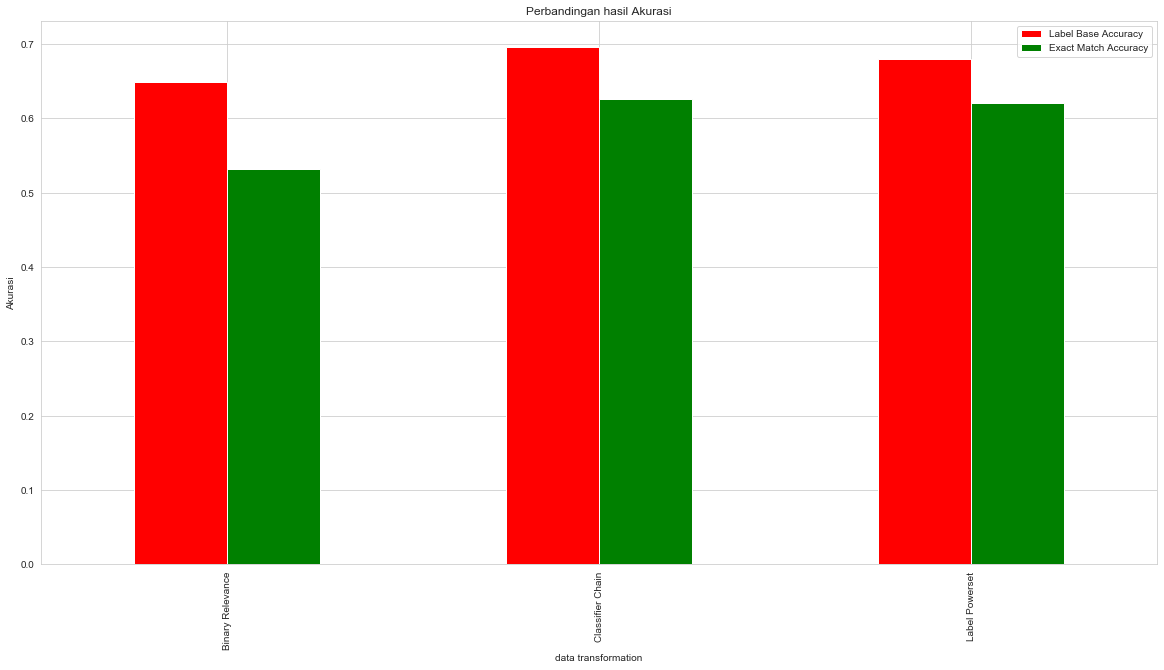

In [87]:
result_acc = pd.DataFrame({
    "Data Transformation" : ["Binary Relevance","Classifier Chain","Label Powerset"],
    "Label Base Accuracy" : [labelSetAcc_BR,labelSetAcc_CC,labelSetAcc_LP],
    "Exact Match Accuracy" : [exactAcc_BR,exactAcc_CC,exactAcc_LP]
})

result_acc = result_acc.set_index("Data Transformation")
result_acc.plot(kind='bar',color="rgb",figsize=(20,10))
plt.title("Perbandingan hasil Akurasi")
plt.xlabel('data transformation')
plt.ylabel('Akurasi')
plt.show()

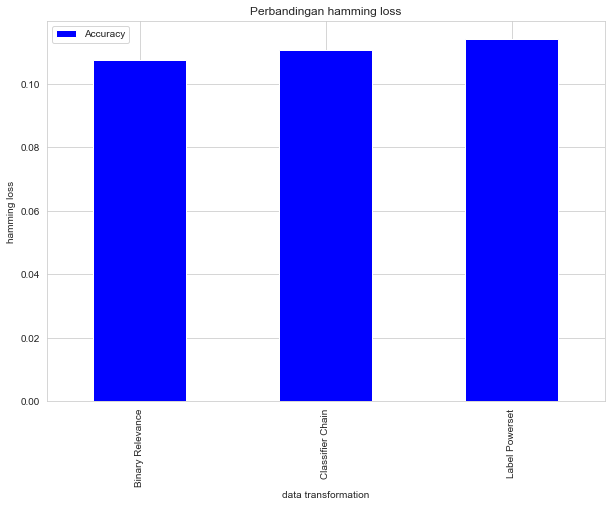

In [88]:
result_haml = pd.DataFrame({
    "Data Transformation" : ["Binary Relevance","Classifier Chain","Label Powerset"],
    "Accuracy" : [haml_BR,haml_CC,haml_LP]
})

result_haml = result_haml.set_index("Data Transformation")
result_haml.plot(kind='bar',color="b",figsize=(10,7))
plt.title("Perbandingan hamming loss")
plt.xlabel('data transformation')
plt.ylabel('hamming loss')
plt.show()

## Result Analysis

In [89]:
fitur = X_test.columns
target = prediction_BR.columns[:12]

### Without Translation

#### Binary Relevance

- ***Exact Match***

In [90]:
data_anl_BR = prediction_BR.join(data_test_tweet[['Tweet_Parsed','Tweet']])

In [91]:
miss_exact_tweet_BR = data_anl_BR[(data_anl_BR["HS"]!=data_anl_BR["HS_predict"]) | (data_anl_BR["Abusive"] != data_anl_BR["Abusive_predict"]) | (data_anl_BR["HS_Individual"] != data_anl_BR["HS_Individual_predict"]) | (data_anl_BR["HS_Group"] != data_anl_BR["HS_Group_predict"]) | (data_anl_BR["HS_Religion"] != data_anl_BR["HS_Religion_predict"]) | (data_anl_BR["HS_Race"] != data_anl_BR["HS_Race"]) | (data_anl_BR["HS_Physical"] != data_anl_BR["HS_Physical_predict"]) | (data_anl_BR["HS_Gender"] != data_anl_BR["HS_Gender_predict"]) | (data_anl_BR["HS_Other"] != data_anl_BR["HS_Other_predict"]) | (data_anl_BR["HS_Weak_predict"] != data_anl_BR["HS_Weak_predict"]) | (data_anl_BR["HS_Moderate_predict"] != data_anl_BR["HS_Moderate_predict"]) | (data_anl_BR["HS_Strong_predict"] != data_anl_BR["HS_Strong_predict"])]
right_exact_tweet_BR = data_anl_BR[(data_anl_BR["HS"]==data_anl_BR["HS_predict"]) & (data_anl_BR["Abusive"] == data_anl_BR["Abusive_predict"]) & (data_anl_BR["HS_Individual"] == data_anl_BR["HS_Individual_predict"]) & (data_anl_BR["HS_Group"] == data_anl_BR["HS_Group_predict"]) & (data_anl_BR["HS_Religion"] == data_anl_BR["HS_Religion_predict"]) & (data_anl_BR["HS_Race"] == data_anl_BR["HS_Race"]) & (data_anl_BR["HS_Physical"] == data_anl_BR["HS_Physical_predict"]) & (data_anl_BR["HS_Gender"] == data_anl_BR["HS_Gender_predict"]) & (data_anl_BR["HS_Other"] == data_anl_BR["HS_Other_predict"]) & (data_anl_BR["HS_Weak_predict"] == data_anl_BR["HS_Weak_predict"]) & (data_anl_BR["HS_Moderate_predict"] == data_anl_BR["HS_Moderate_predict"]) & (data_anl_BR["HS_Strong_predict"] == data_anl_BR["HS_Strong_predict"])]

In [92]:
print("# wrong labeled tweet = ",miss_exact_tweet_BR.shape[0],"/",data_test.shape[0])
print("# right labeled tweet = ",right_exact_tweet_BR.shape[0],"/",data_test.shape[0])

# wrong labeled tweet =  863 / 1976
# right labeled tweet =  1113 / 1976


OOV

In [93]:
def generate_ngrams(s):
    
    # Break sentence in the token, remove empty tokens
    tokens = [token for token in s.str.split(" ") if token != ""]
    
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    ngrams = np.concatenate(tokens)
    return ngrams

In [94]:
def oov(fitur,token):
    outOfVocab = []
    for i in token:
        if i not in fitur:
            outOfVocab.append(i)
    return outOfVocab

def oov_count(oovList):
    oovCount = {}
    for i in oovList:
        if i in oovCount.keys():
            oovCount[i] = oovCount[i]+1
        else:
            oovCount[i] = 1
    return oovCount

In [95]:
wrongtoken = generate_ngrams(miss_exact_tweet_BR['Tweet_Parsed']).tolist()
righttoken = generate_ngrams(right_exact_tweet_BR['Tweet_Parsed']).tolist()

In [96]:
# wrong labeled data OOV
wrong_oov_BR = oov(fitur, wrongtoken)
wrong_oov_BR_count = oov_count(wrong_oov_BR)
wrong_oov_BR_count

{'': 16,
 'kelulus': 1,
 'coret': 2,
 'baju': 4,
 'cupu': 4,
 'kumpul': 1,
 'sumbu': 2,
 'pendek': 2,
 'nikmat': 5,
 'mantap': 4,
 'pilihjokowi': 1,
 'orde': 5,
 'tukang': 5,
 'ustaz': 9,
 'ganyang': 5,
 'taplak': 8,
 'meja': 4,
 'ketemu': 3,
 'arief': 1,
 'cuek': 3,
 'udik': 6,
 'senyum': 4,
 'uh': 2,
 'ab': 1,
 'sombong': 10,
 'murah': 4,
 'sesat': 2,
 'nahdlatul': 2,
 'sembunyi': 2,
 'jahat': 7,
 'lurus': 1,
 'pelihara': 6,
 'organisasi': 3,
 'bayang': 3,
 'kacau': 1,
 'syarat': 1,
 'chi': 1,
 'materi': 1,
 'mafia': 1,
 'kakap': 1,
 'join': 5,
 'homo': 2,
 'rizieq': 1,
 'pantat': 3,
 'pancasila': 4,
 'kabur': 5,
 'pulang': 3,
 'siti': 1,
 'fatimah': 1,
 'komen': 4,
 'laman': 1,
 'ringkas': 1,
 'parah': 3,
 'bejat': 11,
 'sehat': 4,
 'sabar': 3,
 'semangat': 1,
 'niat': 4,
 'pemberitahuan': 11,
 'ntb': 3,
 'miskin': 4,
 'busung': 1,
 'lapar': 2,
 'kantor': 2,
 'entas': 1,
 'pal': 16,
 'buru': 3,
 'sesal': 2,
 'mend': 3,
 'unite': 1,
 'state': 1,
 'america': 1,
 'bola': 2,
 'lapang': 

In [97]:
# right labeled data OOV
right_oov_BR = oov(fitur, righttoken)
right_oov_BR_count = oov_count(right_oov_BR)
right_oov_BR_count

{'hadiah': 1,
 'prediksi': 2,
 'era': 8,
 'generasi': 4,
 'muda': 5,
 'kesiap': 1,
 'bekal': 2,
 'kompetensi': 1,
 'pasuk': 1,
 'digital': 5,
 'revolusi': 5,
 'industri': 4,
 'ge': 5,
 'ppp': 4,
 'periode': 10,
 'kubu': 1,
 'disc': 1,
 'jockey': 1,
 'fariz': 1,
 'residen': 1,
 'country': 1,
 'director': 1,
 'tumbuh': 11,
 'lestari': 4,
 'lingkung': 4,
 'sumber': 10,
 'daya': 5,
 'alam': 10,
 'emisi': 1,
 'kaca': 6,
 'ulang': 4,
 'soeharto': 7,
 'uh': 3,
 'ena': 1,
 'bijak': 10,
 'nomer': 3,
 'mercedes': 1,
 'bmw': 1,
 'kualitas': 2,
 'jenderal': 6,
 'propaganda': 3,
 'perang': 2,
 'utama': 3,
 'israel': 6,
 'golong': 5,
 'radikal': 3,
 'amin': 11,
 'rais': 3,
 'himbau': 1,
 'kader': 3,
 'situ': 1,
 'mulu': 5,
 'mentwit': 5,
 'faedah': 1,
 'kritik': 2,
 'produktif': 1,
 'blunder': 1,
 'simpati': 3,
 'korg': 2,
 'kait': 5,
 'gin': 2,
 'gay': 8,
 'nak': 9,
 'alim': 1,
 'saviour': 1,
 'tengok': 3,
 'truk': 1,
 'ciri': 5,
 'sahaja': 1,
 'individu': 1,
 'pagi': 11,
 'rugi': 7,
 'sehat': 8,
 

In [98]:
print("# OOV on wrong labeled data = ", len(wrong_oov_BR))
print("# unique OOV on wrong labeled data = ", len(np.unique(wrong_oov_BR)))
print()
print("# OOV on right labeled data = ", len(right_oov_BR))
print("# unique OOV on right labeled data = ", len(np.unique(right_oov_BR)))

# OOV on wrong labeled data =  4255
# unique OOV on wrong labeled data =  2272

# OOV on right labeled data =  6322
# unique OOV on right labeled data =  3125


In [99]:
df_wrong_OOVBR = pd.DataFrame(wrong_oov_BR_count.items(),columns=["Tweet","count"])
df_right_OOVBR = pd.DataFrame(right_oov_BR_count.items(),columns=["Tweet","count"])

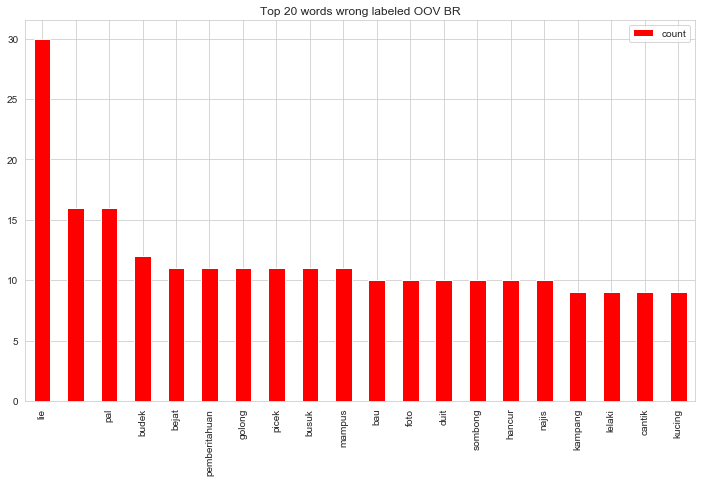

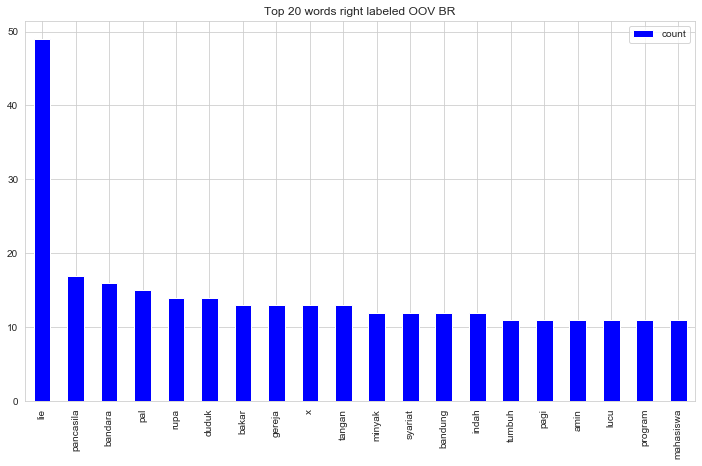

In [100]:
df_wrong_OOVBR.sort_values(['count'],ascending=False).head(20).plot(
    kind='bar', y='count',x='Tweet', color='red', title='Top 20 words wrong labeled OOV BR', figsize=(12,7))
plt.xlabel("")
df_right_OOVBR.sort_values(['count'],ascending=False).head(20).plot(
    kind='bar', y='count',x='Tweet', color='blue', title='Top 20 words right labeled OOV BR', figsize=(12,7))
plt.xlabel("")

plt.show()

Wrong Labeled Tweet

In [101]:
#real tweet
miss_exact_tweet_BR['Tweet'].values

array(['USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER',
       "Dulu waktu kelulusan aku ga pernah coret-coret baju, cupu ya? \\xf0\\x9f\\x98\\x82'",
       'USER USER USER USER Bhuakakakaka...\\nTernyata pendukungnya kumpulan bani ONTA (Sumbu Pendek)..\\xf0\\x9f\\x98\\x82\\xf0\\x9f\\x98\\x82\\xf0\\x9f\\x98\\x82\\n\\nSelamat menikmati kepemimpinan presiden USER\\n\\nMantapkan untuk #2019PilihJokowi\\n',
       'anjing-anjing Orde Baru kayak USER emang tukang NGIBUL.kgk malu mengaku Ustadz?',
       'Ganyang PKI sekuat tenaga', "USER taplak meja kayaknya'",
       "Tadi ketemu arief USER , gw sok-sokan cuek biar ga dikira udik. Terus tiba tiba ketemu mata dan gw dikasih senyum.. ugh ~ (senyumin balik dan tetap lanjut cuek)'",
       'AB orangnya tidak sombong dan murah senyum',
       'USER Pak USER penyesatan yg dilakukan PBNU tampaknya demi kebaikan padahal menyembunyikan JAHAT Islam',
       'Dan orang" yg ngga bisa berpikir lurus itu 

In [102]:
#preprocessed
miss_exact_tweet_BR['Tweet_Parsed'].values

array([' ', 'kelulus coret coret baju cupu',
       'haha nyata dukung kumpul bani onta sumbu pendek selamat nikmat pimpin presiden mantap pilihjokowi',
       'anjing anjing orde kayak tukang tipu malu ustaz',
       'ganyang partai komunis indonesia kuat tenaga',
       'taplak meja kayak',
       'ketemu arief gue sok sok cuek biar udik ketemu mata gue kasih senyum uh senyum cuek',
       'ab orang sombong murah senyum',
       'sesat laku urus nahdlatul ulama sembunyi jahat islam',
       'orang pikir lurus pelihara jokowi organisasi bayang kacau indonesia aduh',
       'syarat tai chi tau main lawan tau materi',
       'mafia kelas kakap join manusia homo',
       'rizieq tau pantat tau pancasila gara gara pantat kabur pulang pulang',
       'akun siti fatimah amp komen laman ringkas parah amp bejat malu moga sehat sabar amp semangat suara',
       'niat surat pemberitahuan rezim ntb miskin busung lapar kampung kantor cuek cari dukung entas miskin pal takut buru komisi berantas ko

In [103]:
#predicted labels
miss_exact_tweet_BR[miss_exact_tweet_BR.columns[12:24].tolist()].values.tolist()

[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0,

In [104]:
#True labels
miss_exact_tweet_BR[miss_exact_tweet_BR.columns[:12].tolist()].values.tolist()

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [1, 1, 0, 1, 0, 0, 0, 0,

Right Labeled Tweet

In [105]:
#real tweet
right_exact_tweet_BR['Tweet'].values.tolist()

["USER USER Ewe ewe berhadiah'",
 'Pada tahun 2045, Indonesia diprediksikan mjd negara ekonomi terbesar no 4 di dunia. Tentunya era tsb milik generasi muda.; Utk itu, diperlukan kesiapan &amp; bekal kompetensi yg kuat agar generasi muda siap memasuki era ekonomi digital revolusi industri ge',
 'Ini baru "BERITA"; ; PPP TOLAK PENCAPRESAN JOKOWI...!; ; 1. Baru Didukung PDIP, PPP Tolak Jokowi Menjadi Presiden Dua Periode; ; Partai Persatuan Pembangunan (PPP) kubu Djan Faridz dengan tegas menolak Jokowi kembali memimpin Indonesia untuk dua periode. ð???',
 'USER, Resident Country Director USER: Pertumbuhan ekonomi tidak harus mengurangi kelestarian lingkungan, justru pertumbuhan ini dapat membantu Pemerintah Indonesia melestarikan sumber daya alam dan mengurangi emisi gaa rumah kaca.',
 'UMAT HINDU SAMPAIKAN SELAMAT ULANG TAHUN KEPADA PRESIDENÂ SOEHARTO',
 'RT USER Unch ena nya jadi bapak sby korupsi teruss',
 'Luar Biasa hingga kebijakan Indonesia tdk boleh bertentangan dgn kepentingan Ci

In [106]:
#preprocessed
right_exact_tweet_BR['Tweet_Parsed'].values.tolist()

['ngewe ngewe hadiah',
 'indonesia prediksi negara ekonomi dunia era milik generasi muda kesiap amp bekal kompetensi kuat generasi muda pasuk era ekonomi digital revolusi industri ge',
 'berita ppp tolak calon presiden jokowi dukung partai demokrasi indonesia juang ppp tolak jokowi presiden periode partai bangun ppp kubu main disc jockey fariz tolak jokowi pimpin indonesia periode',
 'residen country director tumbuh ekonomi lestari lingkung tumbuh bantu perintah indonesia lestari sumber daya alam emisi rumah kaca',
 'umat hindu selamat ulang presiden soeharto',
 'uh ena susilo bambang yudhoyono korupsi',
 'bijak indonesia cina',
 'pilih kepala daerah jawa timur nomer menang mercedes nomer menang bmw kualitas',
 'jenderal propaganda perang propaganda jual utama partai komunis indonesia cina',
 'perintah israel golong yahudi radikal beda rakyat damai',
 'amin rais himbau masyarakat salah pilih pimpin',
 'kader situ bicara mulu mentwit mulu faedah uniform resource locator',
 'kritik prabo

In [107]:
#predicted labels
right_exact_tweet_BR[right_exact_tweet_BR.columns[12:24].tolist()].values.tolist()

[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0,

In [108]:
#True labels
right_exact_tweet_BR[right_exact_tweet_BR.columns[:12].tolist()].values.tolist()

[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0,

- ***Label Based***

Wrong Labeled

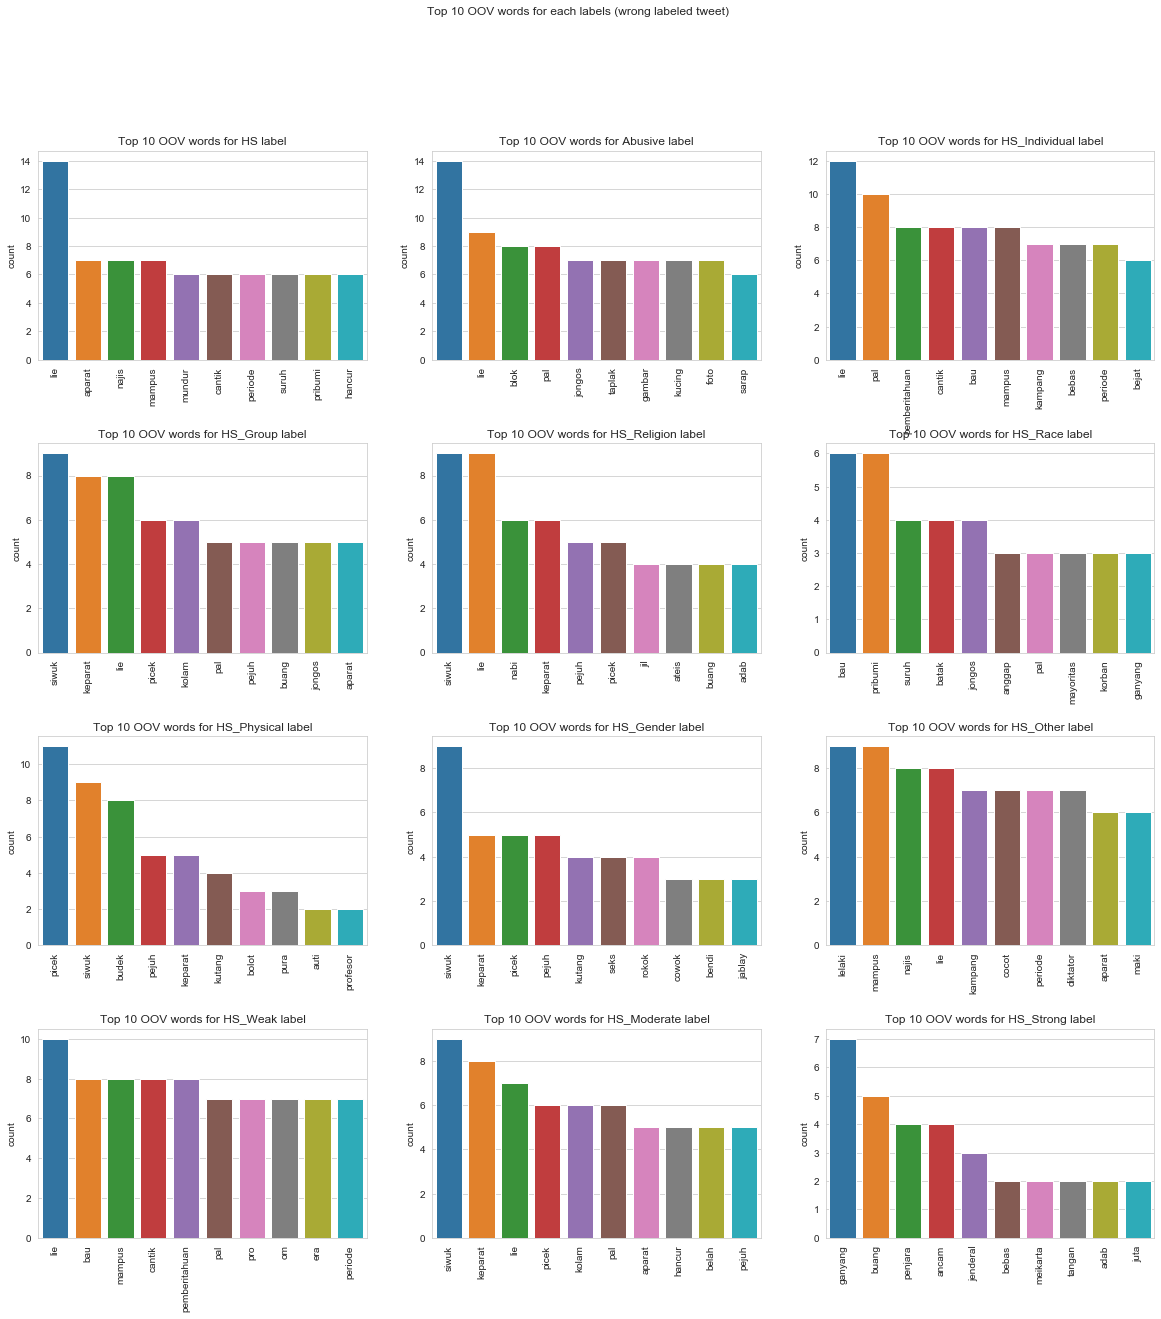

In [109]:
plt.figure(figsize=(20,20))
plt.suptitle('Top 10 OOV words for each labels (wrong labeled tweet)')
for i in range (len(target)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust(hspace=0.4)
    wrongtweet = data_anl_BR[data_anl_BR[target[i]]!=data_anl_BR[target[i]+str("_predict")]]
    wrongtoken = generate_ngrams(wrongtweet['Tweet_Parsed']).tolist()
    wrong_oov = oov(fitur, wrongtoken)
    wrong_oov_count = oov_count(wrong_oov)
    frame = pd.DataFrame(wrong_oov_count.items(),columns=["Tweet","count"])
    frame = frame.sort_values(['count'],ascending=False).head(10)
    sns.barplot(x="Tweet", y="count", data=frame).set_xticklabels(sns.barplot(x="Tweet", y="count", data=frame).get_xticklabels(),rotation=90)
    title='Top 10 OOV words for '+str(target[i])+" label"
    plt.title(title)
    plt.xlabel("")
#     plt.show();

Right Labeled

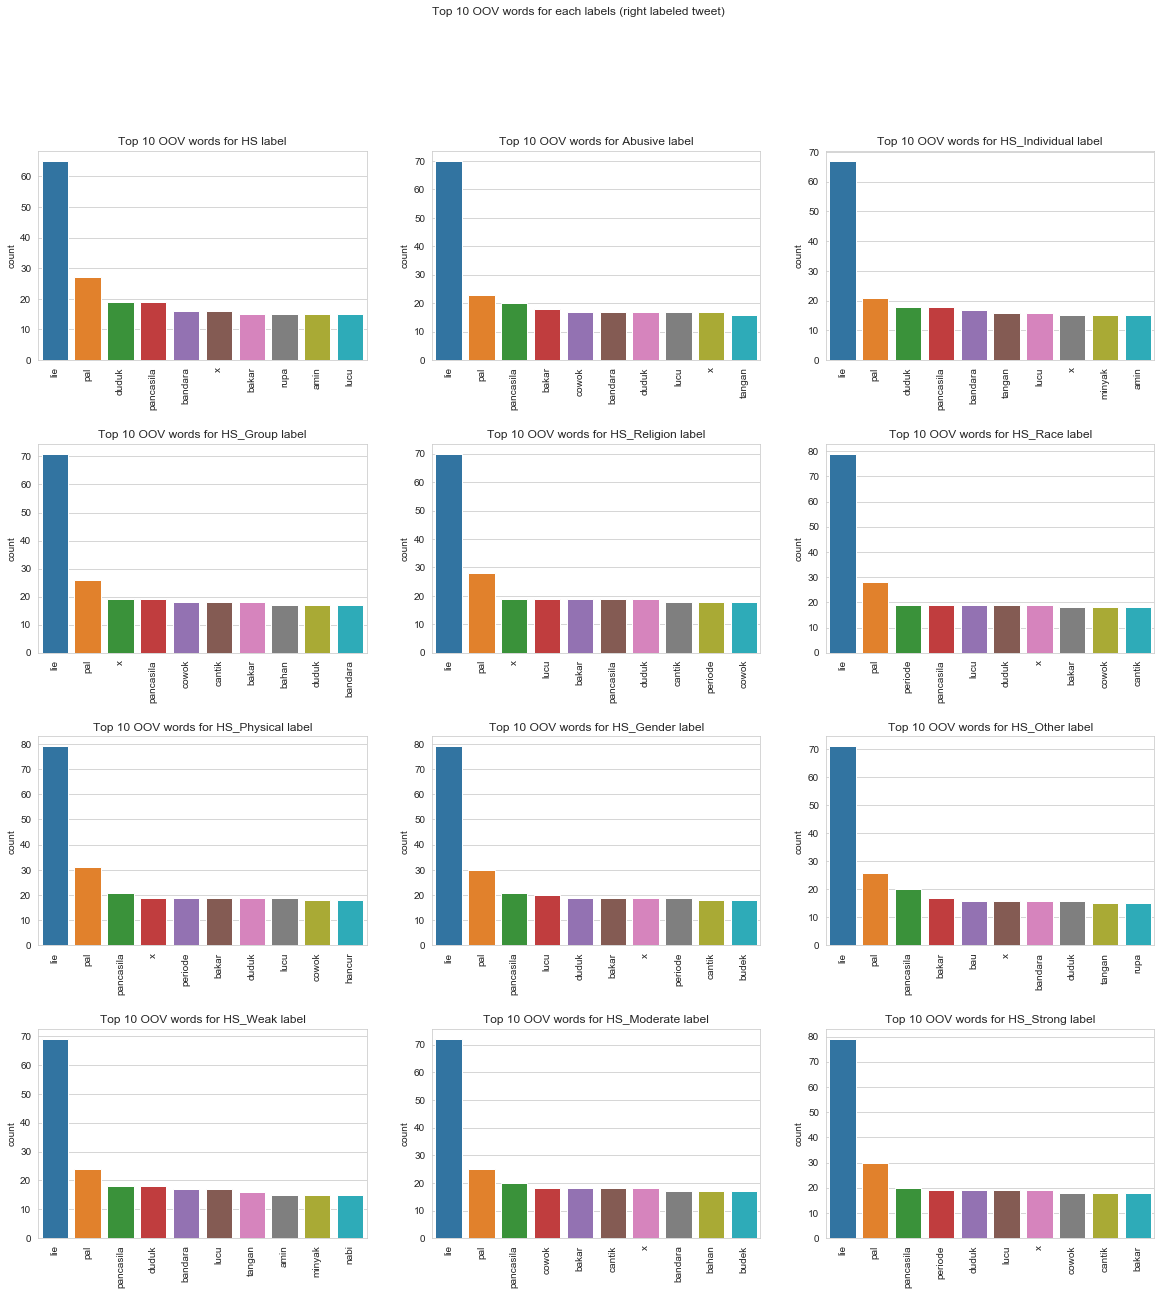

In [110]:
plt.figure(figsize=(20,20))
plt.suptitle('Top 10 OOV words for each labels (right labeled tweet)')
for i in range (len(target)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust(hspace=0.4)
    wrongtweet = data_anl_BR[data_anl_BR[target[i]]==data_anl_BR[target[i]+str("_predict")]]
    wrongtoken = generate_ngrams(wrongtweet['Tweet_Parsed']).tolist()
    wrong_oov = oov(fitur, wrongtoken)
    wrong_oov_count = oov_count(wrong_oov)
    frame = pd.DataFrame(wrong_oov_count.items(),columns=["Tweet","count"])
    frame = frame.sort_values(['count'],ascending=False).head(10)
    sns.barplot(x="Tweet", y="count", data=frame).set_xticklabels(sns.barplot(x="Tweet", y="count", data=frame).get_xticklabels(),rotation=90)
    title='Top 10 OOV words for '+str(target[i])+" label"
    plt.title(title)
    plt.xlabel("")
#     plt.show();

#### Classifier Chain

- ***Exact Match***

In [111]:
data_anl_CC = prediction_CC.join(data_test_tweet[['Tweet_Parsed','Tweet']])

In [112]:
miss_exact_tweet_CC = data_anl_CC[(data_anl_CC["HS"]!=data_anl_CC["HS_predict"]) | (data_anl_CC["Abusive"] != data_anl_CC["Abusive_predict"]) | (data_anl_CC["HS_Individual"] != data_anl_CC["HS_Individual_predict"]) | (data_anl_CC["HS_Group"] != data_anl_CC["HS_Group_predict"]) | (data_anl_CC["HS_Religion"] != data_anl_CC["HS_Religion_predict"]) | (data_anl_CC["HS_Race"] != data_anl_CC["HS_Race"]) | (data_anl_CC["HS_Physical"] != data_anl_CC["HS_Physical_predict"]) | (data_anl_CC["HS_Gender"] != data_anl_CC["HS_Gender_predict"]) | (data_anl_CC["HS_Other"] != data_anl_CC["HS_Other_predict"]) | (data_anl_CC["HS_Weak_predict"] != data_anl_CC["HS_Weak_predict"]) | (data_anl_CC["HS_Moderate_predict"] != data_anl_CC["HS_Moderate_predict"]) | (data_anl_CC["HS_Strong_predict"] != data_anl_CC["HS_Strong_predict"])]
right_exact_tweet_CC = data_anl_CC[(data_anl_CC["HS"]==data_anl_CC["HS_predict"]) & (data_anl_CC["Abusive"] == data_anl_CC["Abusive_predict"]) & (data_anl_CC["HS_Individual"] == data_anl_CC["HS_Individual_predict"]) & (data_anl_CC["HS_Group"] == data_anl_CC["HS_Group_predict"]) & (data_anl_CC["HS_Religion"] == data_anl_CC["HS_Religion_predict"]) & (data_anl_CC["HS_Race"] == data_anl_CC["HS_Race"]) & (data_anl_CC["HS_Physical"] == data_anl_CC["HS_Physical_predict"]) & (data_anl_CC["HS_Gender"] == data_anl_CC["HS_Gender_predict"]) & (data_anl_CC["HS_Other"] == data_anl_CC["HS_Other_predict"]) & (data_anl_CC["HS_Weak_predict"] == data_anl_CC["HS_Weak_predict"]) & (data_anl_CC["HS_Moderate_predict"] == data_anl_CC["HS_Moderate_predict"]) & (data_anl_CC["HS_Strong_predict"] == data_anl_CC["HS_Strong_predict"])]

In [113]:
print("# wrong labeled tweet = ",miss_exact_tweet_CC.shape[0],"/",data_test.shape[0])
print("# right labeled tweet = ",right_exact_tweet_CC.shape[0],"/",data_test.shape[0])

# wrong labeled tweet =  706 / 1976
# right labeled tweet =  1270 / 1976


OOV

In [114]:
wrongtoken = generate_ngrams(miss_exact_tweet_CC['Tweet_Parsed']).tolist()
righttoken = generate_ngrams(right_exact_tweet_CC['Tweet_Parsed']).tolist()

In [115]:
# wrong labeled data OOV
wrong_oov_CC = oov(fitur, wrongtoken)
wrong_oov_CC_count = oov_count(wrong_oov_CC)
wrong_oov_CC_count

{'ganyang': 3,
 'ketemu': 3,
 'arief': 1,
 'cuek': 3,
 'udik': 5,
 'senyum': 4,
 'uh': 3,
 'ab': 1,
 'sombong': 8,
 'murah': 5,
 'sesat': 2,
 'nahdlatul': 2,
 'sembunyi': 1,
 'jahat': 7,
 'syarat': 1,
 'chi': 1,
 'materi': 1,
 'mafia': 1,
 'kakap': 1,
 'join': 5,
 'homo': 2,
 'rizieq': 2,
 'pantat': 3,
 'pancasila': 4,
 'kabur': 4,
 'pulang': 4,
 'siti': 1,
 'fatimah': 1,
 'komen': 4,
 'laman': 1,
 'ringkas': 1,
 'parah': 3,
 'bejat': 11,
 'sehat': 4,
 'sabar': 3,
 'semangat': 1,
 'niat': 4,
 'pemberitahuan': 7,
 'ntb': 2,
 'miskin': 3,
 'busung': 1,
 'lapar': 2,
 'kantor': 2,
 'entas': 1,
 'pal': 14,
 'buru': 4,
 'sesal': 1,
 'mend': 4,
 'unite': 1,
 'state': 1,
 'america': 1,
 'pokok': 6,
 'bola': 2,
 'lapang': 3,
 'congor': 5,
 'bapuk': 1,
 'bahaya': 3,
 'hutang': 7,
 'bahan': 4,
 'bully': 3,
 'kritik': 4,
 'cashflow': 1,
 'negatif': 2,
 'busuk': 7,
 'istilah': 1,
 'novel': 2,
 'komedi': 1,
 'mbak': 7,
 'catat': 4,
 'menantu': 2,
 'sinting': 6,
 'kocak': 3,
 'tipe': 1,
 'bias': 1,
 

In [116]:
# right labeled data OOV
right_oov_CC = oov(fitur, righttoken)
right_oov_CC_count = oov_count(right_oov_CC)
right_oov_CC_count

{'hadiah': 2,
 'prediksi': 2,
 'era': 10,
 'generasi': 4,
 'muda': 5,
 'kesiap': 1,
 'bekal': 2,
 'kompetensi': 1,
 'pasuk': 1,
 'digital': 5,
 'revolusi': 5,
 'industri': 4,
 'ge': 2,
 'ppp': 4,
 'periode': 11,
 'kubu': 1,
 'disc': 1,
 'jockey': 1,
 'fariz': 1,
 'residen': 1,
 'country': 1,
 'director': 1,
 'tumbuh': 11,
 'lestari': 4,
 'lingkung': 4,
 'sumber': 11,
 'daya': 5,
 'alam': 10,
 'emisi': 1,
 'kaca': 6,
 'ulang': 4,
 'soeharto': 7,
 '': 12,
 'uh': 2,
 'ena': 1,
 'kelulus': 1,
 'coret': 3,
 'baju': 4,
 'cupu': 1,
 'bijak': 12,
 'kumpul': 3,
 'sumbu': 4,
 'pendek': 3,
 'nikmat': 7,
 'mantap': 7,
 'pilihjokowi': 1,
 'nomer': 3,
 'mercedes': 1,
 'bmw': 1,
 'kualitas': 2,
 'jenderal': 7,
 'propaganda': 3,
 'perang': 2,
 'utama': 4,
 'israel': 6,
 'golong': 5,
 'radikal': 4,
 'orde': 2,
 'tukang': 7,
 'ustaz': 3,
 'amin': 11,
 'rais': 1,
 'himbau': 1,
 'kader': 5,
 'situ': 2,
 'mulu': 8,
 'mentwit': 5,
 'faedah': 2,
 'taplak': 5,
 'meja': 2,
 'kritik': 2,
 'produktif': 1,
 'blun

In [117]:
print("# OOV on wrong labeled data = ", len(wrong_oov_CC))
print("# unique OOV on wrong labeled data = ", len(np.unique(wrong_oov_CC)))
print()
print("# OOV on right labeled data = ", len(right_oov_CC))
print("# unique OOV on right labeled data = ", len(np.unique(right_oov_CC)))

# OOV on wrong labeled data =  3506
# unique OOV on wrong labeled data =  1954

# OOV on right labeled data =  7071
# unique OOV on right labeled data =  3363


In [118]:
df_wrong_OOVCC = pd.DataFrame(wrong_oov_CC_count.items(),columns=["Tweet","count"])
df_right_OOVCC = pd.DataFrame(right_oov_CC_count.items(),columns=["Tweet","count"])

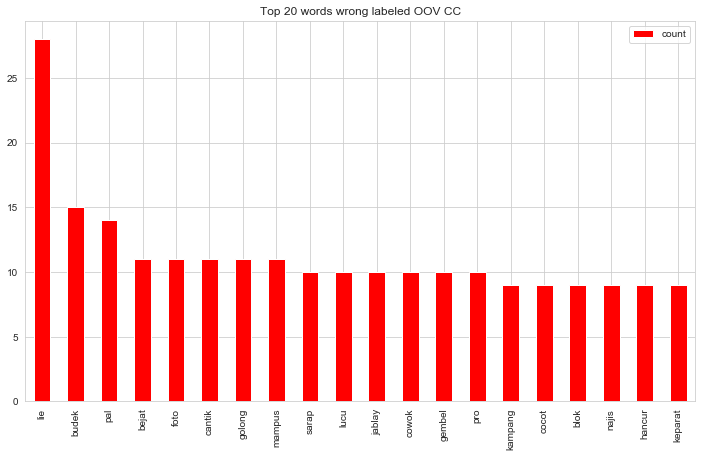

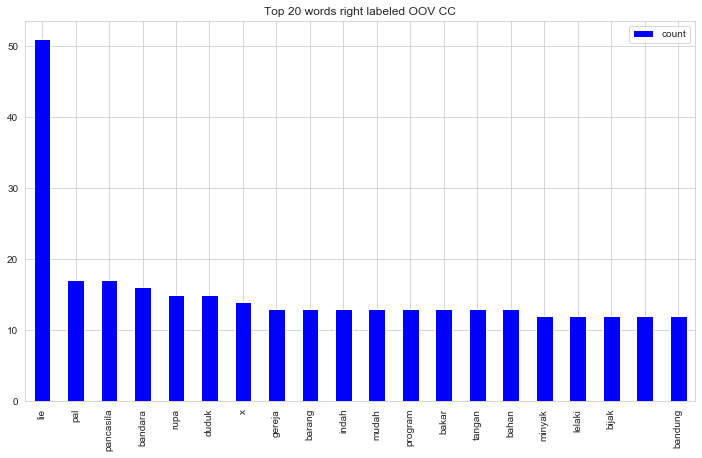

In [119]:
df_wrong_OOVCC.sort_values(['count'],ascending=False).head(20).plot(
    kind='bar', y='count',x='Tweet', color='red', title='Top 20 words wrong labeled OOV CC', figsize=(12,7))
plt.xlabel("")
df_right_OOVCC.sort_values(['count'],ascending=False).head(20).plot(
    kind='bar', y='count',x='Tweet', color='blue', title='Top 20 words right labeled OOV CC', figsize=(12,7))
plt.xlabel("")

plt.show()

Wrong Labeled Tweet

In [120]:
#real tweet
miss_exact_tweet_CC['Tweet'].values.tolist()

['Ganyang PKI sekuat tenaga',
 "Tadi ketemu arief USER , gw sok-sokan cuek biar ga dikira udik. Terus tiba tiba ketemu mata dan gw dikasih senyum.. ugh ~ (senyumin balik dan tetap lanjut cuek)'",
 'AB orangnya tidak sombong dan murah senyum',
 'USER Pak USER penyesatan yg dilakukan PBNU tampaknya demi kebaikan padahal menyembunyikan JAHAT Islam',
 "RT USER: Syarat untuk menggunakan Tai Chi, kudu tauk apa yg sedang dimainkan oleh lawan. Kudu tauk materi yg sedang dipergunakan oleh\\xe2\\x80\\xa6'",
 "USER Dia mafia kelas kakap. Join sini juga jadi maho'",
 "USER USER USER rizik taunya pantat mana tau dia pancasila\\ngara gara pantat pun dia kabur g fulang fulang'",
 "USER Akun Siti Fatimah &amp; yg komen di lamannya, diringkes semua aja...parah &amp; bejat. Memalukan...!!! Bp USER ...semoga sehat selalu, tetap sabar , &amp; semangat terus suarakan kebenaran....'",
 'USER USER USER Ya kalau niatnya spt itu, dari sebelum rezim skg NTB sdh miskin, lah busung lapar dikampung dekat kantornya

In [121]:
#Preprocessed
miss_exact_tweet_CC['Tweet_Parsed'].values.tolist()

['ganyang partai komunis indonesia kuat tenaga',
 'ketemu arief gue sok sok cuek biar udik ketemu mata gue kasih senyum uh senyum cuek',
 'ab orang sombong murah senyum',
 'sesat laku urus nahdlatul ulama sembunyi jahat islam',
 'syarat tai chi tau main lawan tau materi',
 'mafia kelas kakap join manusia homo',
 'rizieq tau pantat tau pancasila gara gara pantat kabur pulang pulang',
 'akun siti fatimah amp komen laman ringkas parah amp bejat malu moga sehat sabar amp semangat suara',
 'niat surat pemberitahuan rezim ntb miskin busung lapar kampung kantor cuek cari dukung entas miskin pal takut buru komisi berantas korupsi',
 'sesal kayak makan tai tau mend unite state america',
 'bejat pokok',
 'bola main lapang main main congor bapuk',
 'sampah',
 'orang tolol idiot bahaya dengar hutang bahan bully perintah kritik presiden hutang cashflow negara negatif',
 'dewan wakil rakyat busuk',
 'istilah novel komedi mbak catat menantu sinting wkwk kocak banget baca deh mbak tipe bias karisma co

In [122]:
#predicted labels
miss_exact_tweet_CC[miss_exact_tweet_CC.columns[12:24].tolist()].values.tolist()

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0],
 [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [123]:
#True labels
miss_exact_tweet_CC[miss_exact_tweet_CC.columns[:12].tolist()].values.tolist()

[[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0,

Right Labeled Tweet

In [124]:
#real tweet
right_exact_tweet_CC['Tweet'].values.tolist()

["USER USER Ewe ewe berhadiah'",
 'Pada tahun 2045, Indonesia diprediksikan mjd negara ekonomi terbesar no 4 di dunia. Tentunya era tsb milik generasi muda.; Utk itu, diperlukan kesiapan &amp; bekal kompetensi yg kuat agar generasi muda siap memasuki era ekonomi digital revolusi industri ge',
 'Ini baru "BERITA"; ; PPP TOLAK PENCAPRESAN JOKOWI...!; ; 1. Baru Didukung PDIP, PPP Tolak Jokowi Menjadi Presiden Dua Periode; ; Partai Persatuan Pembangunan (PPP) kubu Djan Faridz dengan tegas menolak Jokowi kembali memimpin Indonesia untuk dua periode. ð???',
 'USER, Resident Country Director USER: Pertumbuhan ekonomi tidak harus mengurangi kelestarian lingkungan, justru pertumbuhan ini dapat membantu Pemerintah Indonesia melestarikan sumber daya alam dan mengurangi emisi gaa rumah kaca.',
 'UMAT HINDU SAMPAIKAN SELAMAT ULANG TAHUN KEPADA PRESIDENÂ SOEHARTO',
 'USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER',
 'RT USER Unch ena nya jadi bapak sby

In [125]:
#Preprocessed
right_exact_tweet_CC['Tweet_Parsed'].values.tolist()

['ngewe ngewe hadiah',
 'indonesia prediksi negara ekonomi dunia era milik generasi muda kesiap amp bekal kompetensi kuat generasi muda pasuk era ekonomi digital revolusi industri ge',
 'berita ppp tolak calon presiden jokowi dukung partai demokrasi indonesia juang ppp tolak jokowi presiden periode partai bangun ppp kubu main disc jockey fariz tolak jokowi pimpin indonesia periode',
 'residen country director tumbuh ekonomi lestari lingkung tumbuh bantu perintah indonesia lestari sumber daya alam emisi rumah kaca',
 'umat hindu selamat ulang presiden soeharto',
 ' ',
 'uh ena susilo bambang yudhoyono korupsi',
 'kelulus coret coret baju cupu',
 'bijak indonesia cina',
 'haha nyata dukung kumpul bani onta sumbu pendek selamat nikmat pimpin presiden mantap pilihjokowi',
 'pilih kepala daerah jawa timur nomer menang mercedes nomer menang bmw kualitas',
 'jenderal propaganda perang propaganda jual utama partai komunis indonesia cina',
 'perintah israel golong yahudi radikal beda rakyat dam

In [126]:
#predicted labels
right_exact_tweet_CC[right_exact_tweet_CC.columns[12:24].tolist()].values.tolist()

[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0

- ***Label based***

Wrong labeled

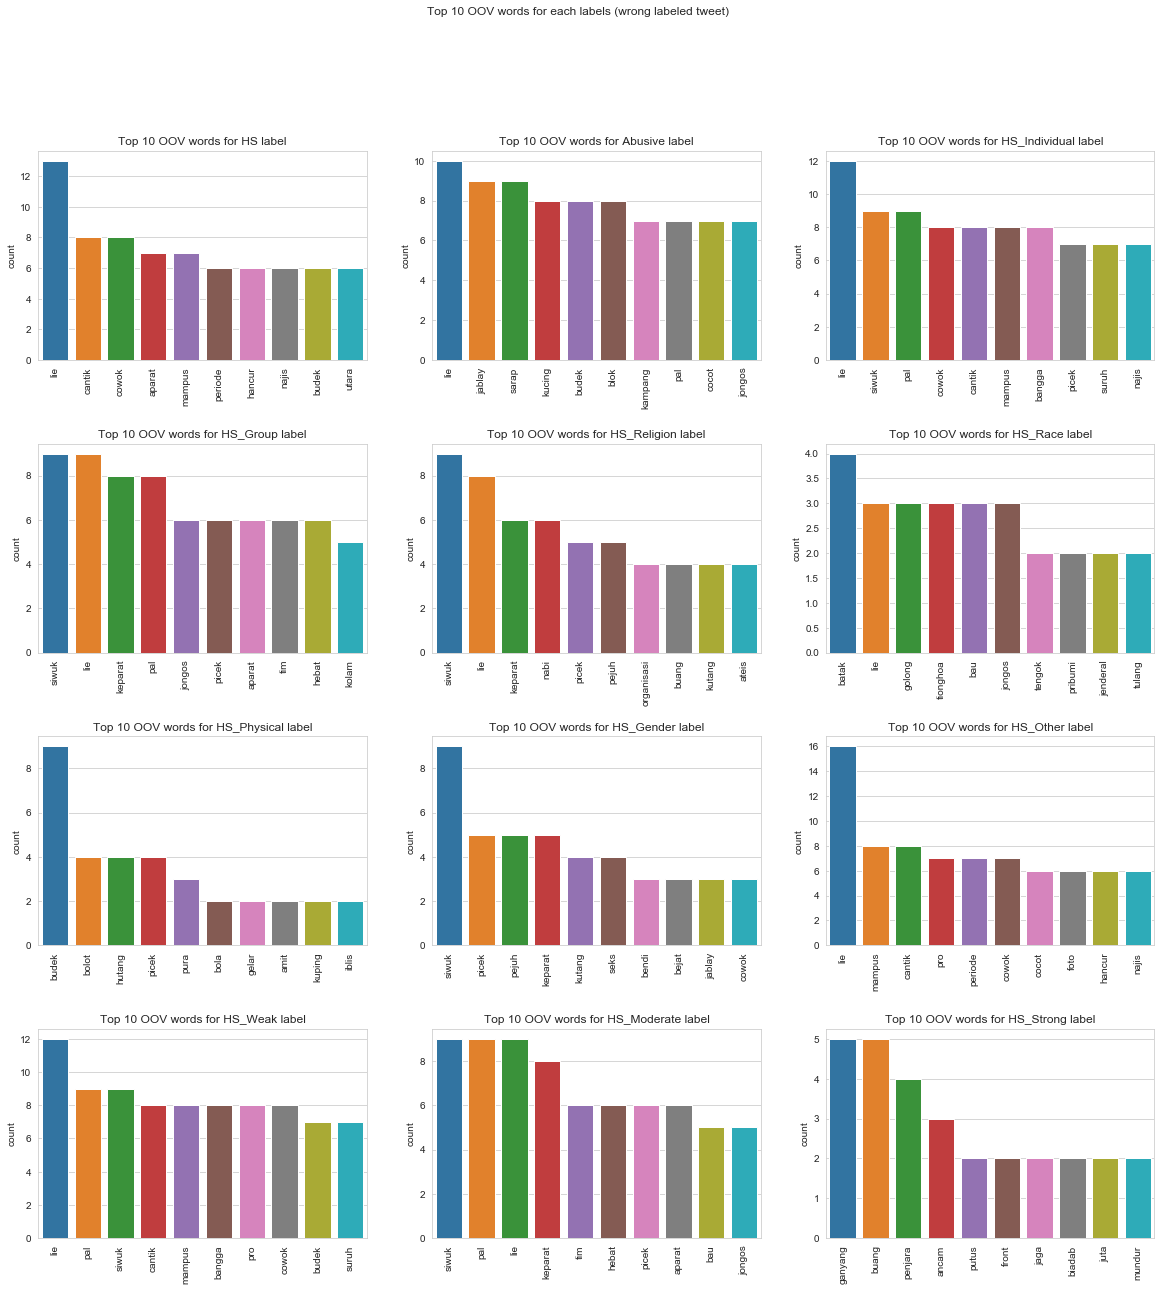

In [127]:
plt.figure(figsize=(20,20))
plt.suptitle('Top 10 OOV words for each labels (wrong labeled tweet)')
for i in range (len(target)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust(hspace=0.4)
    wrongtweet = data_anl_CC[data_anl_CC[target[i]]!=data_anl_CC[target[i]+str("_predict")]]
    wrongtoken = generate_ngrams(wrongtweet['Tweet_Parsed']).tolist()
    wrong_oov = oov(fitur, wrongtoken)
    wrong_oov_count = oov_count(wrong_oov)
    frame = pd.DataFrame(wrong_oov_count.items(),columns=["Tweet","count"])
    frame = frame.sort_values(['count'],ascending=False).head(10)
    sns.barplot(x="Tweet", y="count", data=frame).set_xticklabels(sns.barplot(x="Tweet", y="count", data=frame).get_xticklabels(),rotation=90)
    title='Top 10 OOV words for '+str(target[i])+" label"
    plt.title(title)
    plt.xlabel("")
#     plt.show();

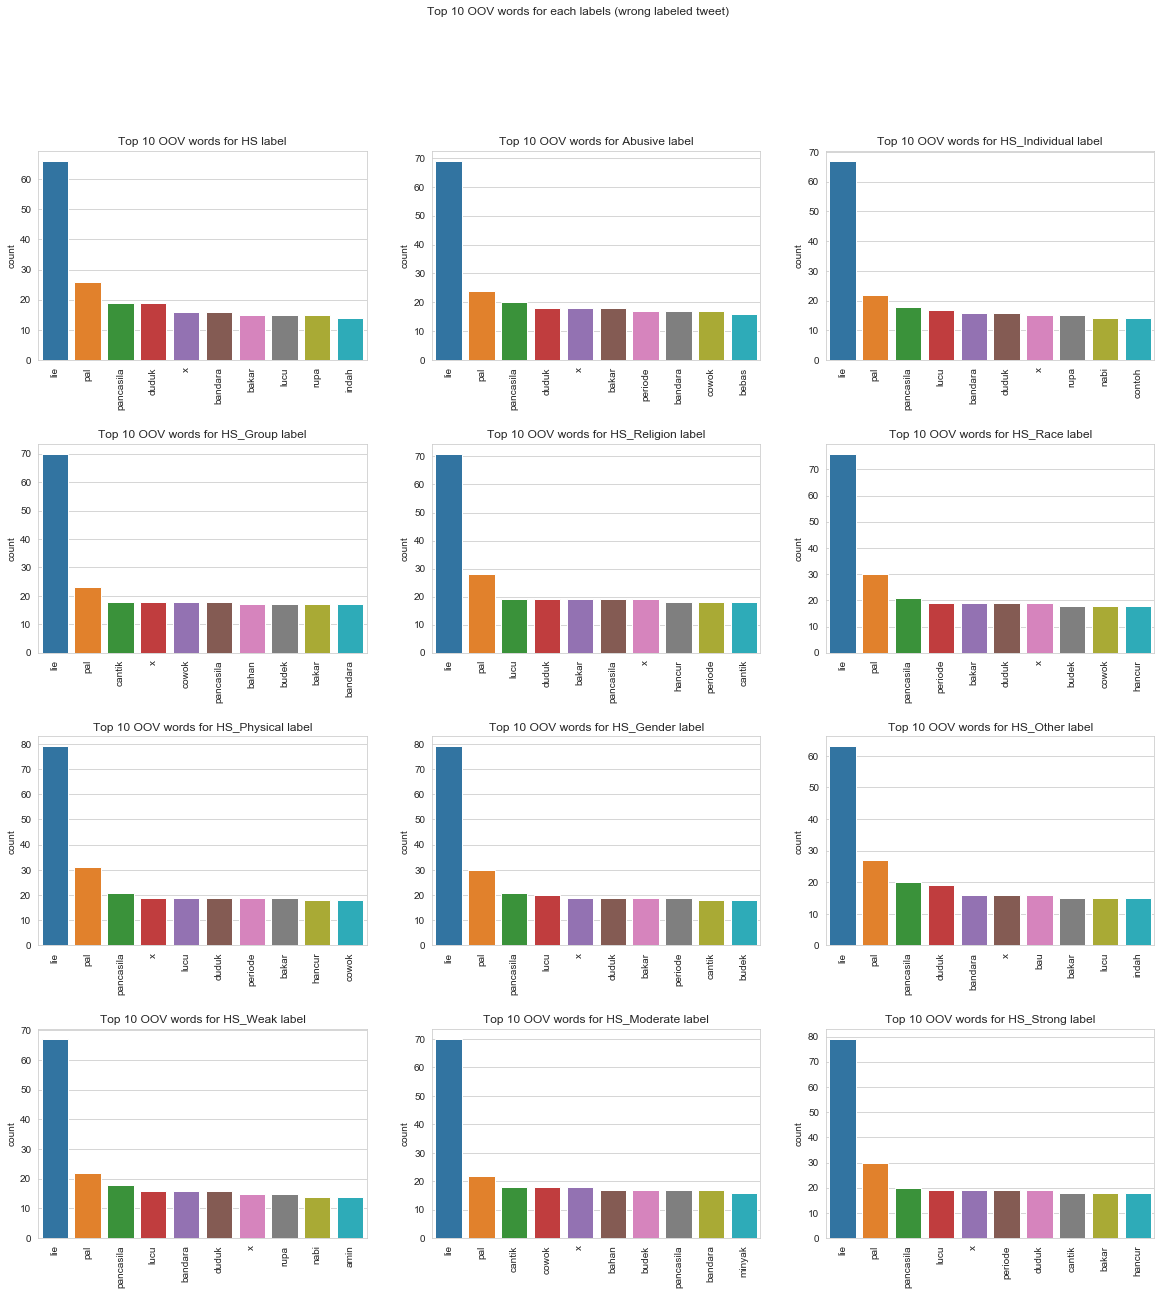

In [128]:
plt.figure(figsize=(20,20))
plt.suptitle('Top 10 OOV words for each labels (wrong labeled tweet)')
for i in range (len(target)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust(hspace=0.4)
    wrongtweet = data_anl_CC[data_anl_CC[target[i]]==data_anl_CC[target[i]+str("_predict")]]
    wrongtoken = generate_ngrams(wrongtweet['Tweet_Parsed']).tolist()
    wrong_oov = oov(fitur, wrongtoken)
    wrong_oov_count = oov_count(wrong_oov)
    frame = pd.DataFrame(wrong_oov_count.items(),columns=["Tweet","count"])
    frame = frame.sort_values(['count'],ascending=False).head(10)
    sns.barplot(x="Tweet", y="count", data=frame).set_xticklabels(sns.barplot(x="Tweet", y="count", data=frame).get_xticklabels(),rotation=90)
    title='Top 10 OOV words for '+str(target[i])+" label"
    plt.title(title)
    plt.xlabel("")
#     plt.show();

#### Label Powerset

In [130]:
data_anl_LP = prediction_LP.join(data_test_tweet[['Tweet_Parsed','Tweet']])

In [131]:
miss_exact_tweet_LP = data_anl_LP[(data_anl_LP["HS"]!=data_anl_LP["HS_predict"]) | (data_anl_LP["Abusive"] != data_anl_LP["Abusive_predict"]) | (data_anl_LP["HS_Individual"] != data_anl_LP["HS_Individual_predict"]) | (data_anl_LP["HS_Group"] != data_anl_LP["HS_Group_predict"]) | (data_anl_LP["HS_Religion"] != data_anl_LP["HS_Religion_predict"]) | (data_anl_LP["HS_Race"] != data_anl_LP["HS_Race"]) | (data_anl_LP["HS_Physical"] != data_anl_LP["HS_Physical_predict"]) | (data_anl_LP["HS_Gender"] != data_anl_LP["HS_Gender_predict"]) | (data_anl_LP["HS_Other"] != data_anl_LP["HS_Other_predict"]) | (data_anl_LP["HS_Weak_predict"] != data_anl_LP["HS_Weak_predict"]) | (data_anl_LP["HS_Moderate_predict"] != data_anl_LP["HS_Moderate_predict"]) | (data_anl_LP["HS_Strong_predict"] != data_anl_LP["HS_Strong_predict"])]
right_exact_tweet_LP = data_anl_LP[(data_anl_LP["HS"]==data_anl_LP["HS_predict"]) & (data_anl_LP["Abusive"] == data_anl_LP["Abusive_predict"]) & (data_anl_LP["HS_Individual"] == data_anl_LP["HS_Individual_predict"]) & (data_anl_LP["HS_Group"] == data_anl_LP["HS_Group_predict"]) & (data_anl_LP["HS_Religion"] == data_anl_LP["HS_Religion_predict"]) & (data_anl_LP["HS_Race"] == data_anl_LP["HS_Race"]) & (data_anl_LP["HS_Physical"] == data_anl_LP["HS_Physical_predict"]) & (data_anl_LP["HS_Gender"] == data_anl_LP["HS_Gender_predict"]) & (data_anl_LP["HS_Other"] == data_anl_LP["HS_Other_predict"]) & (data_anl_LP["HS_Weak_predict"] == data_anl_LP["HS_Weak_predict"]) & (data_anl_LP["HS_Moderate_predict"] == data_anl_LP["HS_Moderate_predict"]) & (data_anl_LP["HS_Strong_predict"] == data_anl_LP["HS_Strong_predict"])]

In [132]:
print("# wrong labeled tweet = ",miss_exact_tweet_LP.shape[0],"/",data_test.shape[0])
print("# right labeled tweet = ",right_exact_tweet_LP.shape[0],"/",data_test.shape[0])

# wrong labeled tweet =  726 / 1976
# right labeled tweet =  1250 / 1976


OOV

In [133]:
wrongtoken = generate_ngrams(miss_exact_tweet_LP['Tweet_Parsed']).tolist()
righttoken = generate_ngrams(right_exact_tweet_LP['Tweet_Parsed']).tolist()

In [134]:
# wrong labeled data OOV
wrong_oov_LP = oov(fitur, wrongtoken)
wrong_oov_LP_count = oov_count(wrong_oov_LP)
wrong_oov_LP_count

{'kumpul': 2,
 'sumbu': 2,
 'pendek': 2,
 'nikmat': 5,
 'mantap': 3,
 'pilihjokowi': 1,
 'kader': 6,
 'situ': 5,
 'mulu': 6,
 'mentwit': 4,
 'faedah': 2,
 'ganyang': 5,
 'ketemu': 3,
 'arief': 1,
 'cuek': 2,
 'udik': 5,
 'senyum': 3,
 'uh': 3,
 'sesat': 2,
 'nahdlatul': 2,
 'sembunyi': 1,
 'jahat': 7,
 'syarat': 1,
 'chi': 1,
 'materi': 1,
 'mafia': 1,
 'kakap': 1,
 'join': 5,
 'homo': 2,
 'rizieq': 2,
 'pantat': 3,
 'pancasila': 4,
 'kabur': 4,
 'pulang': 4,
 'nasrani': 1,
 'siti': 1,
 'fatimah': 1,
 'komen': 4,
 'laman': 1,
 'ringkas': 1,
 'parah': 3,
 'bejat': 13,
 'sehat': 3,
 'sabar': 2,
 'semangat': 1,
 'sesal': 2,
 'mend': 3,
 'unite': 1,
 'state': 1,
 'america': 1,
 'pokok': 4,
 'bola': 2,
 'lapang': 2,
 'congor': 8,
 'bapuk': 1,
 'lomba': 1,
 'hias': 1,
 'telur': 3,
 'ambisius': 2,
 'hadiah': 1,
 'taplak': 5,
 'bahaya': 3,
 'hutang': 7,
 'bahan': 3,
 'bully': 3,
 'kritik': 4,
 'cashflow': 1,
 'negatif': 2,
 'busuk': 9,
 'istilah': 1,
 'novel': 2,
 'komedi': 1,
 'mbak': 5,
 'ca

In [135]:
# right labeled data OOV
right_oov_LP = oov(fitur, righttoken)
right_oov_LP_count = oov_count(right_oov_LP)
right_oov_LP_count

{'hadiah': 1,
 'prediksi': 1,
 'era': 8,
 'generasi': 4,
 'muda': 5,
 'kesiap': 1,
 'bekal': 2,
 'kompetensi': 1,
 'pasuk': 1,
 'digital': 5,
 'revolusi': 5,
 'industri': 4,
 'ge': 5,
 'ppp': 4,
 'periode': 10,
 'kubu': 1,
 'disc': 1,
 'jockey': 1,
 'fariz': 1,
 'residen': 1,
 'country': 1,
 'director': 1,
 'tumbuh': 11,
 'lestari': 4,
 'lingkung': 4,
 'sumber': 12,
 'daya': 6,
 'alam': 10,
 'emisi': 1,
 'kaca': 6,
 'ulang': 4,
 'soeharto': 6,
 '': 12,
 'uh': 2,
 'ena': 1,
 'kelulus': 1,
 'coret': 3,
 'baju': 5,
 'cupu': 1,
 'bijak': 11,
 'nomer': 3,
 'mercedes': 1,
 'bmw': 1,
 'kualitas': 1,
 'jenderal': 7,
 'propaganda': 3,
 'perang': 2,
 'utama': 3,
 'israel': 6,
 'golong': 7,
 'radikal': 3,
 'orde': 2,
 'tukang': 7,
 'ustaz': 5,
 'amin': 12,
 'rais': 3,
 'himbau': 1,
 'taplak': 5,
 'meja': 3,
 'kritik': 2,
 'produktif': 1,
 'blunder': 1,
 'simpati': 3,
 'korg': 2,
 'kait': 6,
 'gin': 1,
 'gay': 8,
 'nak': 8,
 'alim': 2,
 'saviour': 1,
 'tengok': 4,
 'truk': 2,
 'ciri': 5,
 'sahaja'

In [136]:
print("# OOV on wrong labeled data = ", len(wrong_oov_LP))
print("# unique OOV on wrong labeled data = ", len(np.unique(wrong_oov_LP)))
print()
print("# OOV on right labeled data = ", len(right_oov_LP))
print("# unique OOV on right labeled data = ", len(np.unique(right_oov_LP)))

# OOV on wrong labeled data =  3531
# unique OOV on wrong labeled data =  1965

# OOV on right labeled data =  7046
# unique OOV on right labeled data =  3375


In [137]:
df_wrong_OOVLP = pd.DataFrame(wrong_oov_LP_count.items(),columns=["Tweet","count"])
df_right_OOVLP = pd.DataFrame(right_oov_LP_count.items(),columns=["Tweet","count"])

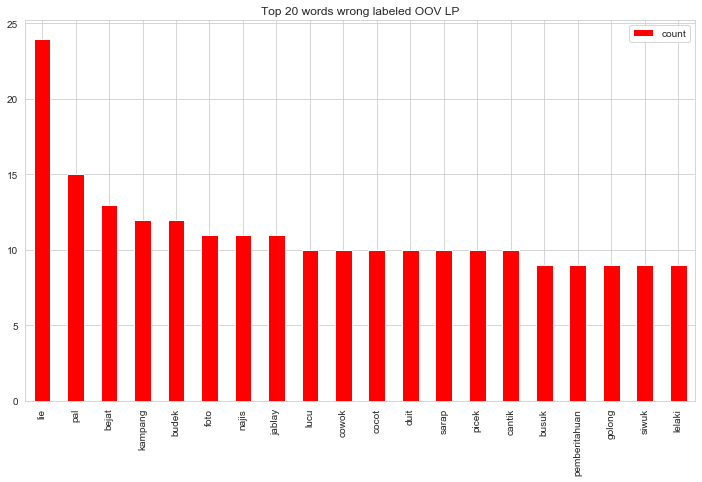

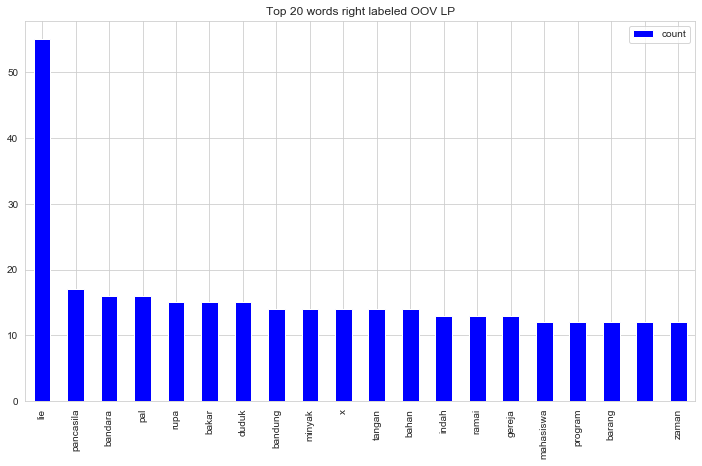

In [138]:
df_wrong_OOVLP.sort_values(['count'],ascending=False).head(20).plot(
    kind='bar', y='count',x='Tweet', color='red', title='Top 20 words wrong labeled OOV LP', figsize=(12,7))
plt.xlabel("")
df_right_OOVLP.sort_values(['count'],ascending=False).head(20).plot(
    kind='bar', y='count',x='Tweet', color='blue', title='Top 20 words right labeled OOV LP', figsize=(12,7))
plt.xlabel("")

plt.show()

Wrong Labeled Tweet

In [139]:
#real tweet
miss_exact_tweet_LP['Tweet'].values.tolist()

['USER USER USER USER Bhuakakakaka...\\nTernyata pendukungnya kumpulan bani ONTA (Sumbu Pendek)..\\xf0\\x9f\\x98\\x82\\xf0\\x9f\\x98\\x82\\xf0\\x9f\\x98\\x82\\n\\nSelamat menikmati kepemimpinan presiden USER\\n\\nMantapkan untuk #2019PilihJokowi\\n',
 'Hee? Bukannya kader situ yg ngomong mulu lebih tepatnya ngetwitt mulu tanpa faedah URL',
 'Ganyang PKI sekuat tenaga',
 "Tadi ketemu arief USER , gw sok-sokan cuek biar ga dikira udik. Terus tiba tiba ketemu mata dan gw dikasih senyum.. ugh ~ (senyumin balik dan tetap lanjut cuek)'",
 'USER Pak USER penyesatan yg dilakukan PBNU tampaknya demi kebaikan padahal menyembunyikan JAHAT Islam',
 "RT USER: Syarat untuk menggunakan Tai Chi, kudu tauk apa yg sedang dimainkan oleh lawan. Kudu tauk materi yg sedang dipergunakan oleh\\xe2\\x80\\xa6'",
 "USER Dia mafia kelas kakap. Join sini juga jadi maho'",
 "USER USER USER rizik taunya pantat mana tau dia pancasila\\ngara gara pantat pun dia kabur g fulang fulang'",
 "USER USER USER Ngemeng lu dasa

In [140]:
#Preprocessed
miss_exact_tweet_LP['Tweet_Parsed'].values.tolist()

['haha nyata dukung kumpul bani onta sumbu pendek selamat nikmat pimpin presiden mantap pilihjokowi',
 'kader situ bicara mulu mentwit mulu faedah uniform resource locator',
 'ganyang partai komunis indonesia kuat tenaga',
 'ketemu arief gue sok sok cuek biar udik ketemu mata gue kasih senyum uh senyum cuek',
 'sesat laku urus nahdlatul ulama sembunyi jahat islam',
 'syarat tai chi tau main lawan tau materi',
 'mafia kelas kakap join manusia homo',
 'rizieq tau pantat tau pancasila gara gara pantat kabur pulang pulang',
 'bicara dasar nasrani kafir',
 'cebong erti wkwk',
 'akun siti fatimah amp komen laman ringkas parah amp bejat malu moga sehat sabar amp semangat suara',
 'sesal kayak makan tai tau mend unite state america',
 'bejat pokok',
 'bola main lapang main main congor bapuk',
 'sampah',
 'aduh lomba hias telur kelas ambisius hadiah taplak',
 'orang tolol idiot bahaya dengar hutang bahan bully perintah kritik presiden hutang cashflow negara negatif',
 'dewan wakil rakyat busuk'

In [141]:
#predicted labels
miss_exact_tweet_LP[miss_exact_tweet_LP.columns[12:24].tolist()].values.tolist()

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0,

In [142]:
#True labels
miss_exact_tweet_LP[miss_exact_tweet_LP.columns[:12].tolist()].values.tolist()

[[1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0,

Right Labeled Tweet

In [143]:
#real tweet
right_exact_tweet_LP['Tweet'].values.tolist()

["USER USER Ewe ewe berhadiah'",
 'Pada tahun 2045, Indonesia diprediksikan mjd negara ekonomi terbesar no 4 di dunia. Tentunya era tsb milik generasi muda.; Utk itu, diperlukan kesiapan &amp; bekal kompetensi yg kuat agar generasi muda siap memasuki era ekonomi digital revolusi industri ge',
 'Ini baru "BERITA"; ; PPP TOLAK PENCAPRESAN JOKOWI...!; ; 1. Baru Didukung PDIP, PPP Tolak Jokowi Menjadi Presiden Dua Periode; ; Partai Persatuan Pembangunan (PPP) kubu Djan Faridz dengan tegas menolak Jokowi kembali memimpin Indonesia untuk dua periode. ð???',
 'USER, Resident Country Director USER: Pertumbuhan ekonomi tidak harus mengurangi kelestarian lingkungan, justru pertumbuhan ini dapat membantu Pemerintah Indonesia melestarikan sumber daya alam dan mengurangi emisi gaa rumah kaca.',
 'UMAT HINDU SAMPAIKAN SELAMAT ULANG TAHUN KEPADA PRESIDENÂ SOEHARTO',
 'USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER',
 'RT USER Unch ena nya jadi bapak sby

In [144]:
#Preprocessed
right_exact_tweet_LP['Tweet_Parsed'].values.tolist()

['ngewe ngewe hadiah',
 'indonesia prediksi negara ekonomi dunia era milik generasi muda kesiap amp bekal kompetensi kuat generasi muda pasuk era ekonomi digital revolusi industri ge',
 'berita ppp tolak calon presiden jokowi dukung partai demokrasi indonesia juang ppp tolak jokowi presiden periode partai bangun ppp kubu main disc jockey fariz tolak jokowi pimpin indonesia periode',
 'residen country director tumbuh ekonomi lestari lingkung tumbuh bantu perintah indonesia lestari sumber daya alam emisi rumah kaca',
 'umat hindu selamat ulang presiden soeharto',
 ' ',
 'uh ena susilo bambang yudhoyono korupsi',
 'kelulus coret coret baju cupu',
 'bijak indonesia cina',
 'pilih kepala daerah jawa timur nomer menang mercedes nomer menang bmw kualitas',
 'jenderal propaganda perang propaganda jual utama partai komunis indonesia cina',
 'perintah israel golong yahudi radikal beda rakyat damai',
 'anjing anjing orde kayak tukang tipu malu ustaz',
 'amin rais himbau masyarakat salah pilih pim

In [145]:
#predicted labels
right_exact_tweet_LP[right_exact_tweet_LP.columns[12:24].tolist()].values.tolist()

[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0,

- ***Label based***

Wrong labeled

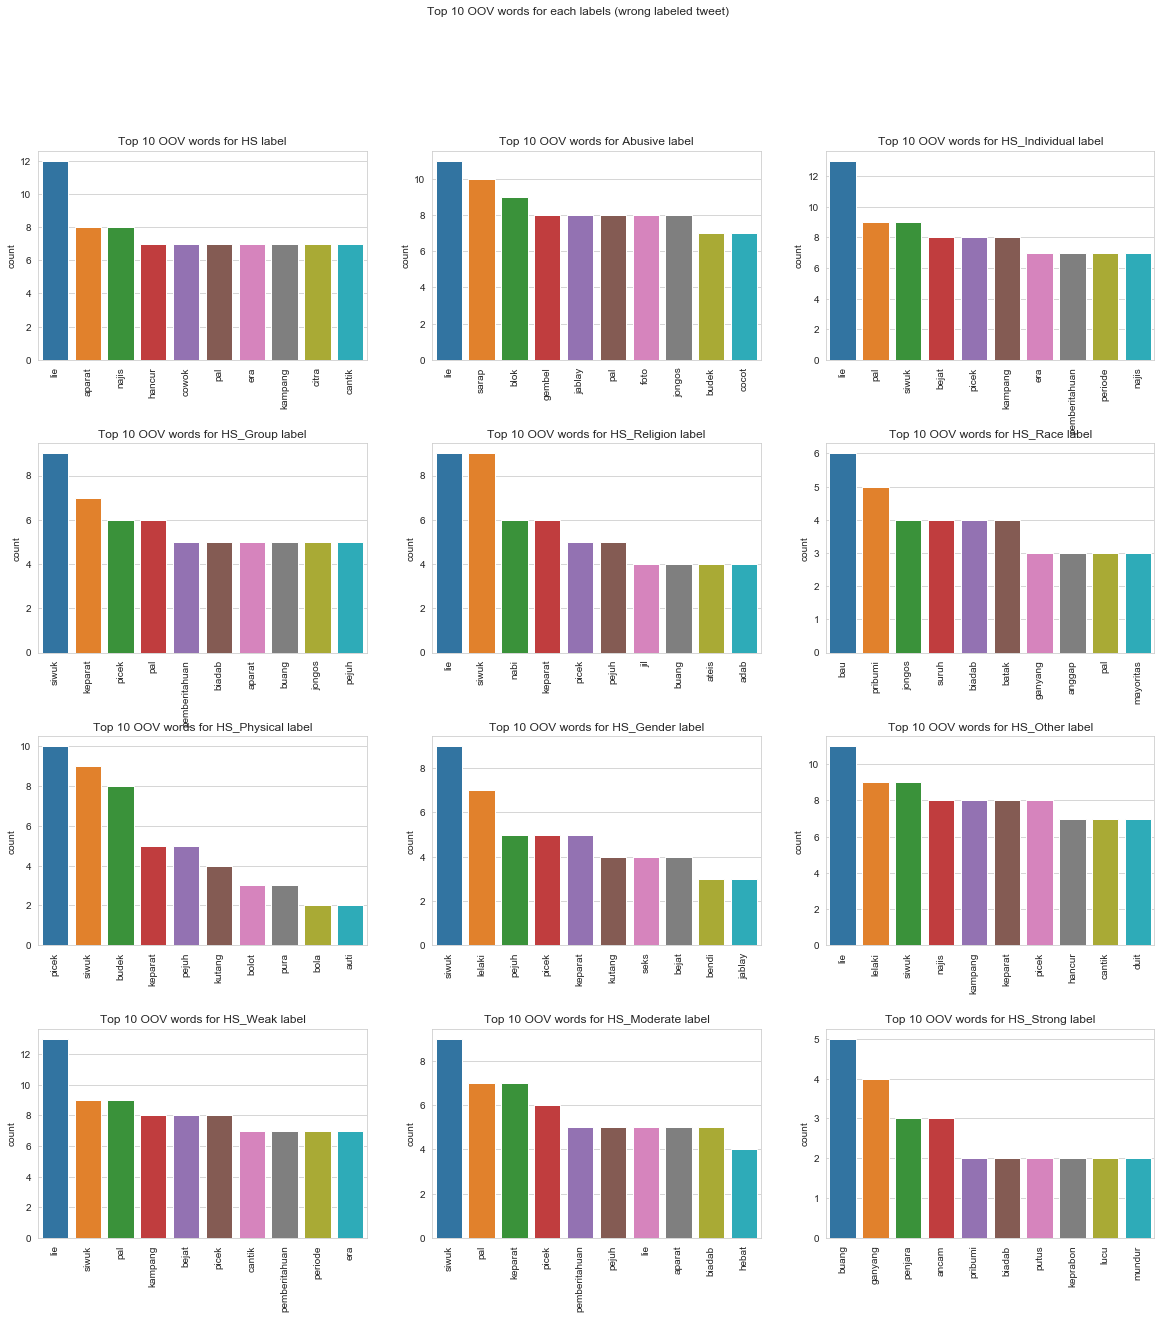

In [146]:
plt.figure(figsize=(20,20))
plt.suptitle('Top 10 OOV words for each labels (wrong labeled tweet)')
for i in range (len(target)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust(hspace=0.4)
    wrongtweet = data_anl_LP[data_anl_LP[target[i]]!=data_anl_LP[target[i]+str("_predict")]]
    wrongtoken = generate_ngrams(wrongtweet['Tweet_Parsed']).tolist()
    wrong_oov = oov(fitur, wrongtoken)
    wrong_oov_count = oov_count(wrong_oov)
    frame = pd.DataFrame(wrong_oov_count.items(),columns=["Tweet","count"])
    frame = frame.sort_values(['count'],ascending=False).head(10)
    sns.barplot(x="Tweet", y="count", data=frame).set_xticklabels(sns.barplot(x="Tweet", y="count", data=frame).get_xticklabels(),rotation=90)
    title='Top 10 OOV words for '+str(target[i])+" label"
    plt.title(title)
    plt.xlabel("")
#     plt.show();

Right labeled

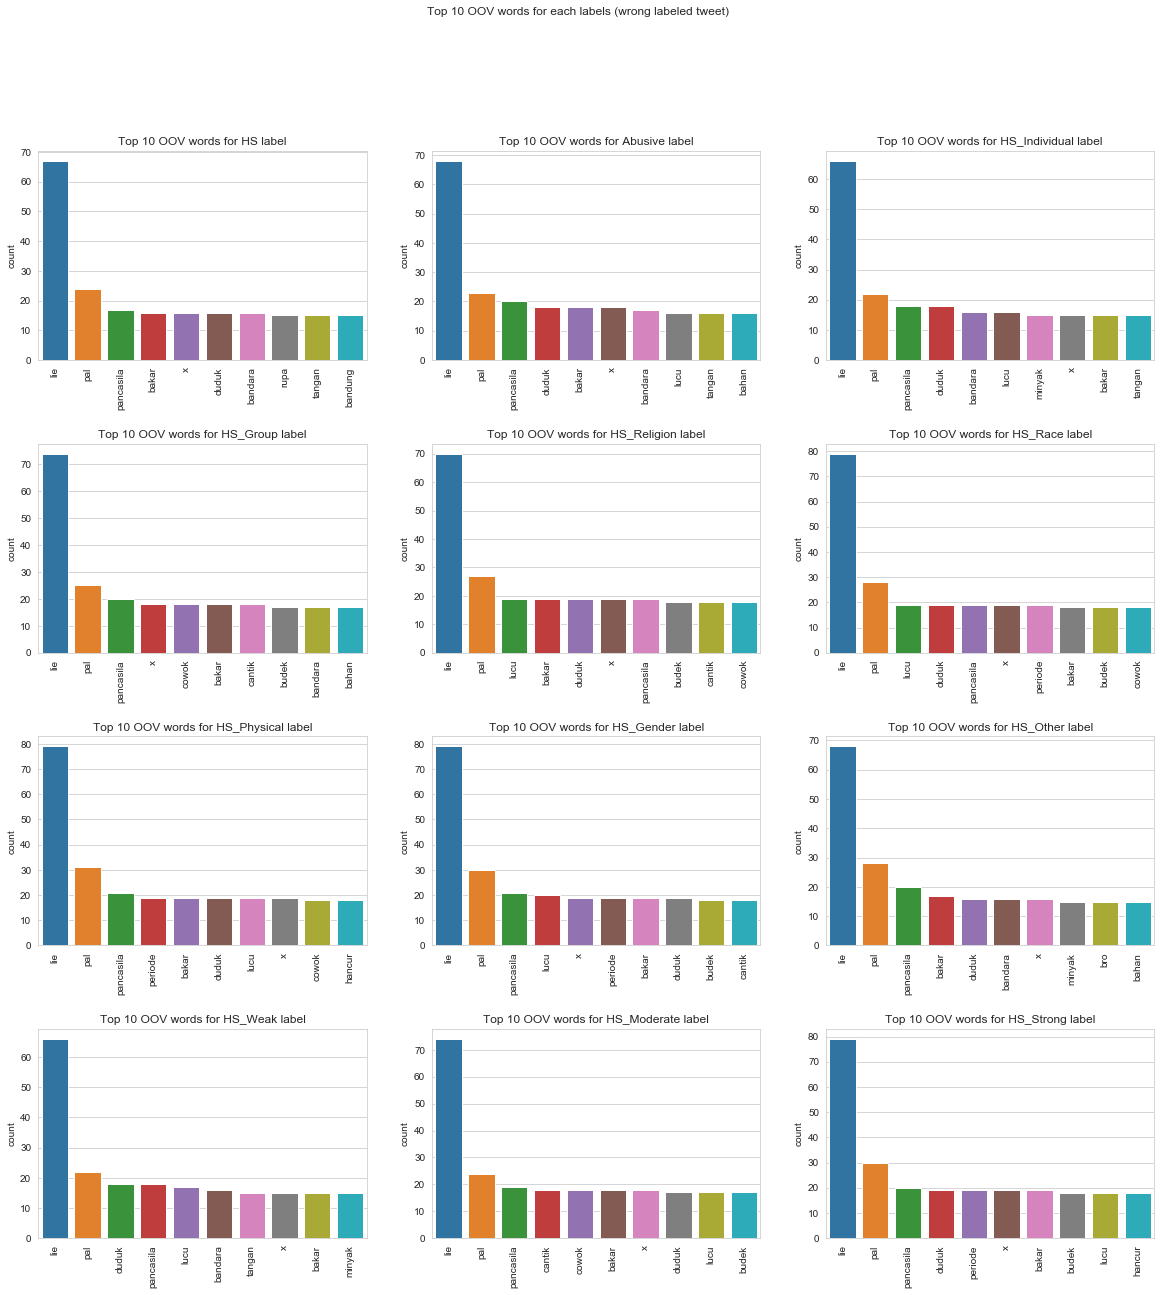

In [147]:
plt.figure(figsize=(20,20))
plt.suptitle('Top 10 OOV words for each labels (wrong labeled tweet)')
for i in range (len(target)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust(hspace=0.4)
    wrongtweet = data_anl_LP[data_anl_LP[target[i]]==data_anl_LP[target[i]+str("_predict")]]
    wrongtoken = generate_ngrams(wrongtweet['Tweet_Parsed']).tolist()
    wrong_oov = oov(fitur, wrongtoken)
    wrong_oov_count = oov_count(wrong_oov)
    frame = pd.DataFrame(wrong_oov_count.items(),columns=["Tweet","count"])
    frame = frame.sort_values(['count'],ascending=False).head(10)
    sns.barplot(x="Tweet", y="count", data=frame).set_xticklabels(sns.barplot(x="Tweet", y="count", data=frame).get_xticklabels(),rotation=90)
    title='Top 10 OOV words for '+str(target[i])+" label"
    plt.title(title)
    plt.xlabel("")
#     plt.show();